In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_log_error, r2_score, root_mean_squared_error


In [3]:

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error, r2_score, make_scorer


In [4]:
df = pd.read_csv('train.csv')

# EDA

In [5]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


array([[<Axes: title={'center': 'Id'}>,
        <Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>],
       [<Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>],
       [<Axes: title={'center': 'TotalBsmtSF'}>,
        <Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>],
       [<Axes: title={'center': 'BsmtHalfBath'}>,
        <Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,

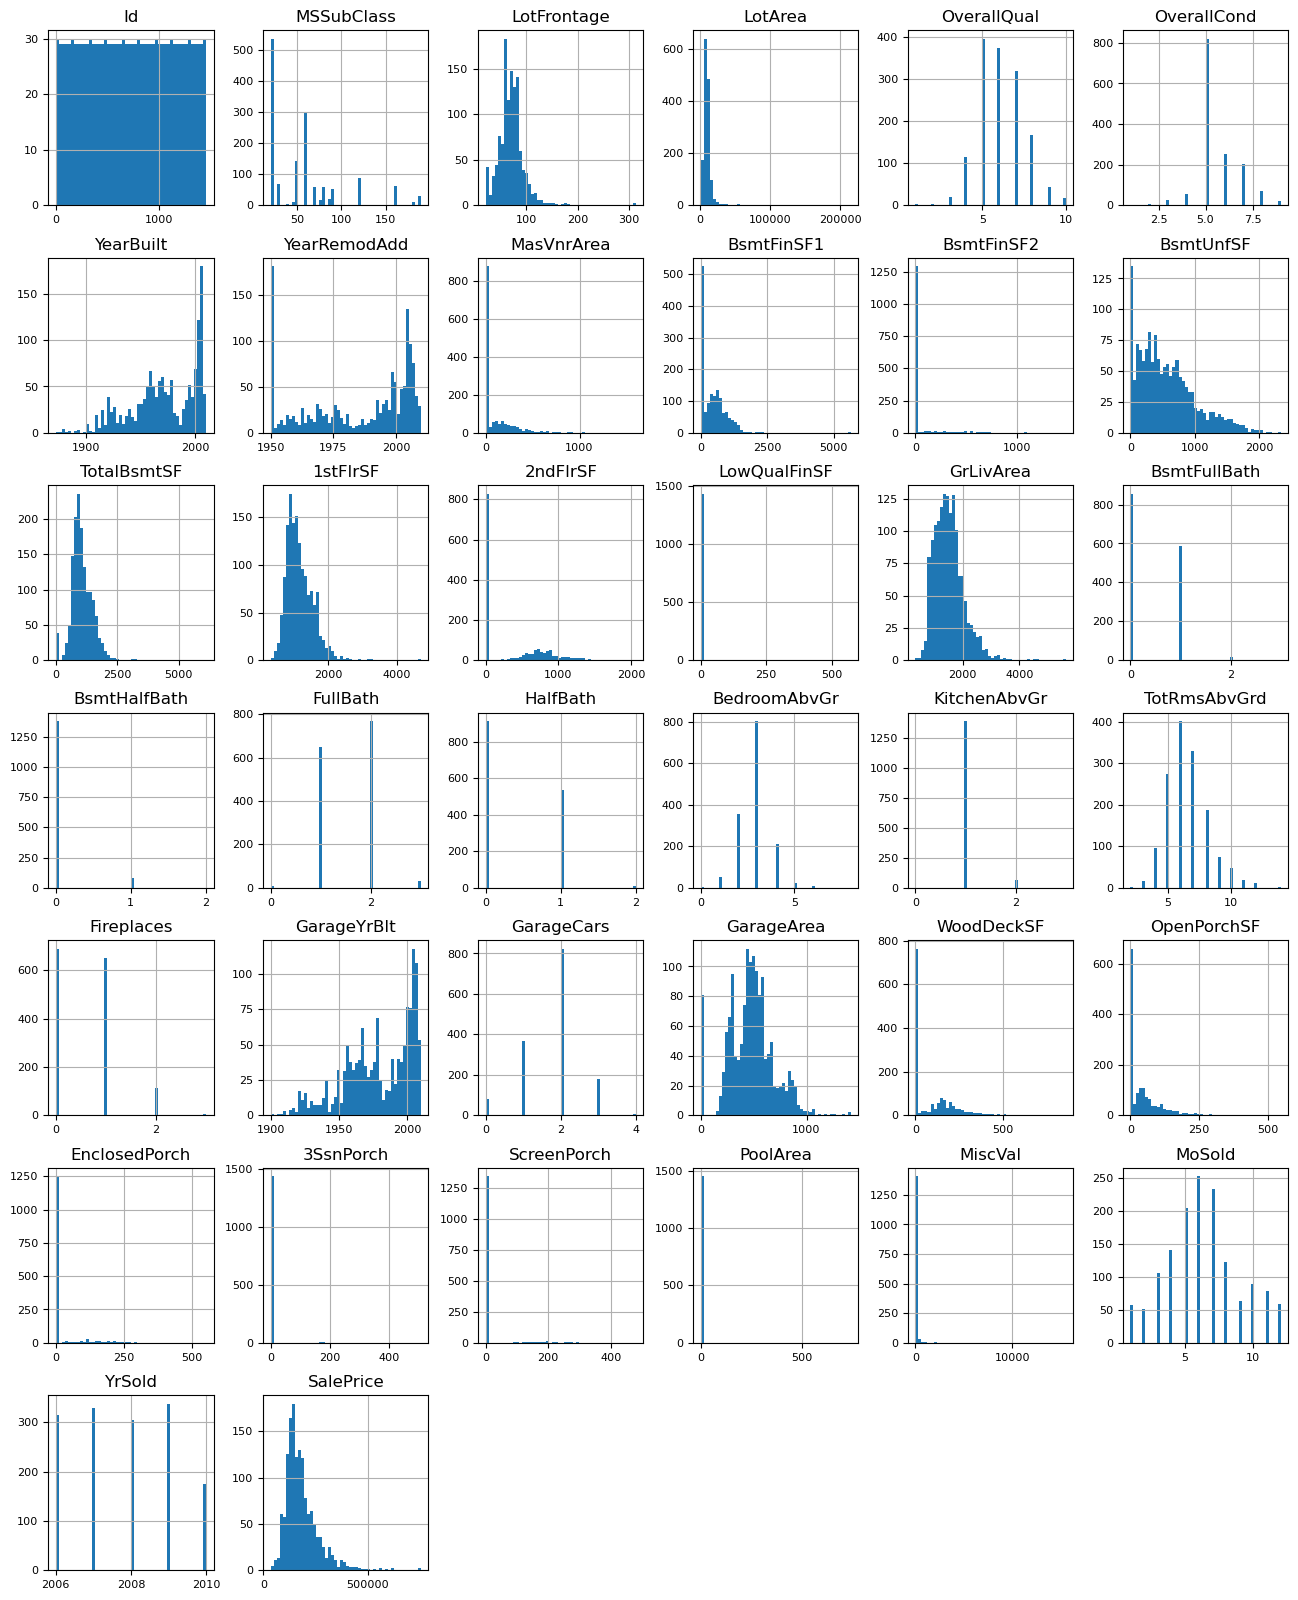

In [6]:
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [7]:
[ (i,j) for i,j in df.nunique().items() if j<=2]

[('Street', 2), ('Alley', 2), ('Utilities', 2), ('CentralAir', 2)]

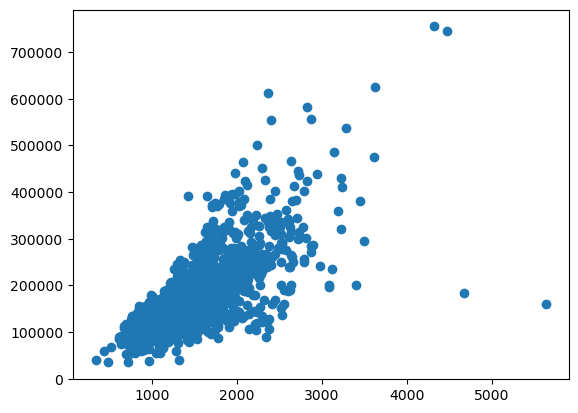

In [8]:
plt.plot( df['GrLivArea'], df['SalePrice'],'o')
#There seems to be a linear relationship between GrLivArea and SalePrice, but 2 outliers. 

In [ ]:
df_clean = df[(df['GrLivArea']<4500) & (df['SalePrice']<500000)]

In [10]:
df['YearBuilt'].max()

2010

In [11]:
corr = df[numeric_cols].corr().abs()
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

high_corr_pairs = [
    (col, row, corr.loc[row, col])
    for col in upper.columns
    for row in upper.index
    if upper.loc[row, col] > 0.9
]

for x, y, val in sorted(high_corr_pairs, key=lambda x: -x[2]):
    print(f"{x} ~ {y} : corr = {val:.3f}")


NameError: name 'numeric_cols' is not defined

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X_vif = df[numeric_cols].copy().dropna()  # no missing
X_vif = add_constant(X_vif)

vif_series = pd.Series(
    [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])],
    index=X_vif.columns
)

print(vif_series.sort_values(ascending=False))


const            2.391614e+06
GrLivArea        6.986563e+00
YearBuilt        5.893528e+00
TotRmsAbvGrd     4.567239e+00
GarageYrBlt      4.472391e+00
GarageArea       4.409682e+00
GarageCars       4.263308e+00
OverallQual      3.362782e+00
FullBath         3.022425e+00
YearRemodAdd     2.680042e+00
TotalBsmtSF      2.454198e+00
BedroomAbvGr     2.187829e+00
HalfBath         1.849669e+00
OverallCond      1.734848e+00
LotFrontage      1.607658e+00
Fireplaces       1.533450e+00
MasVnrArea       1.426630e+00
KitchenAbvGr     1.367335e+00
LotArea          1.333208e+00
EnclosedPorch    1.307069e+00
OpenPorchSF      1.293946e+00
BsmtFullBath     1.289972e+00
WoodDeckSF       1.227317e+00
PoolArea         1.164083e+00
ScreenPorch      1.142850e+00
MiscVal          1.093002e+00
BsmtHalfBath     1.082644e+00
MoSold           1.062935e+00
YrSold           1.052608e+00
3SsnPorch        1.029123e+00
dtype: float64


# Baseline

In [13]:
TARGET_COL = "SalePrice"          # change to your target column
RANDOM_STATE = 42

y = df[TARGET_COL].copy()
X = df.drop(columns=[TARGET_COL,'Id'])

# keep only numeric predictors
X_num = X.select_dtypes(include=[np.number]).copy()

# -----------------------------------------------
# 2.  Train‑test split (stratify if classes skew)
# -----------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_num, y, test_size=0.20, random_state=RANDOM_STATE
)

# -------------------------------------------------
# 3.  Build pipeline: impute → scale → logit model
# -------------------------------------------------
lin_reg = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler(with_mean=False),   # keeps it sparse‑safe
    LinearRegression()
)

# Fit
lin_reg.fit(X_train, y_train)

# Predict
y_pred = lin_reg.predict(X_test)

# Evaluate
rmsle = root_mean_squared_log_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)

print(f"RMSLE : {rmsle:,.2f}")
print(f"RMSE  : {rmse:,.2f}")
print(f"R²   : {r2:.4f}")

RMSLE : 0.19
RMSE  : 36,839.73
R²   : 0.8231


# Submission

In [14]:
test = pd.read_csv('test.csv')
X_test = test.select_dtypes(include=[np.number]).copy()
pred = lin_reg.predict(X_test.drop(columns=['Id']))
submission = pd.DataFrame({
    'Id': test['Id'],
    'SalePrice': pred
})
submission.to_csv('submission.csv', index=False)

# Predict log result

In [15]:
TARGET_COL = "SalePrice"          # change to your target column

y = np.log(df[TARGET_COL].copy())
X = df.drop(columns=[TARGET_COL,'Id'])

# keep only numeric predictors
X_num = X.select_dtypes(include=[np.number]).copy()

# -----------------------------------------------
# 2.  Train‑test split (stratify if classes skew)
# -----------------------------------------------

X_train, X_test, y_train, y_test = train_test_split(
    X_num, y, test_size=0.20,)

# -------------------------------------------------
# 3.  Build pipeline: impute → scale → logit model
# -------------------------------------------------
lin_reg = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler(with_mean=False),   # keeps it sparse‑safe
    LinearRegression()
)

# Fit
lin_reg.fit(X_train, y_train)

# Predict
y_pred = lin_reg.predict(X_test)

# Evaluate
rmsle = root_mean_squared_log_error(y_test, np.exp(y_pred))
rmse = root_mean_squared_error(y_test, np.exp(y_pred))
r2   = r2_score(y_test, np.exp(y_pred))

print(f"RMSLE : {rmsle:,.2f}")
print(f"R²   : {r2:.4f}")

RMSLE : 9.45
R²   : -368142643008.7828


In [16]:
TARGET_COL = "SalePrice"          # change to your target column
RANDOM_STATE = 421

y = np.log(df_clean[TARGET_COL].copy())
X = df_clean.drop(columns=[TARGET_COL,'Id'])

# keep only numeric predictors
X_num = X.select_dtypes(include=[np.number]).copy()

# -----------------------------------------------
# 2.  Train‑test split (stratify if classes skew)
# -----------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_num, y, test_size=0.20, random_state=RANDOM_STATE
)

# -------------------------------------------------
# 3.  Build pipeline: impute → scale → logit model
# -------------------------------------------------
lin_reg = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler(with_mean=False),   # keeps it sparse‑safe
    LinearRegression()
)

# Fit
lin_reg.fit(X_train, y_train)

# Predict
y_pred = lin_reg.predict(X_test)

# Evaluate
rmsle = root_mean_squared_log_error(y_test, np.exp(y_pred))
rmse = root_mean_squared_error(y_test, np.exp(y_pred))
r2   = r2_score(y_test, np.exp(y_pred))

print(f"RMSLE : {rmsle:,.2f}")
print(f"R²   : {r2:.4f}")


RMSLE : 9.47
R²   : -302332850401.5307


In [17]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# One hot encode

<Axes: >

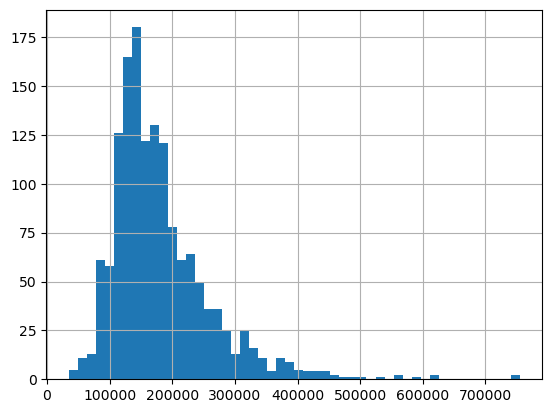

In [18]:
df[TARGET_COL].hist(bins=50)

<Axes: >

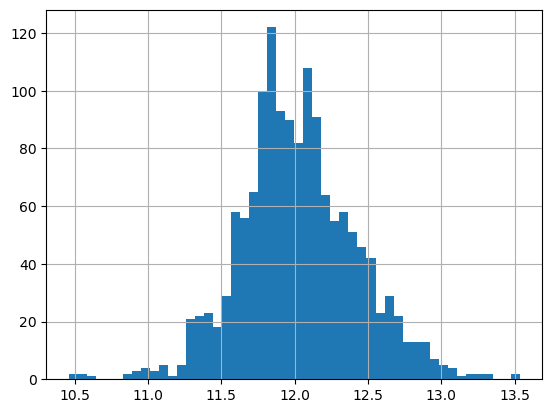

In [19]:
np.log(df[TARGET_COL]).hist(bins=50)

In [20]:
import numpy as np
import pandas as pd

from sklearn.model_selection    import train_test_split
from sklearn.pipeline           import Pipeline, make_pipeline
from sklearn.compose            import ColumnTransformer
from sklearn.preprocessing      import StandardScaler, OneHotEncoder
from sklearn.impute             import SimpleImputer
from sklearn.linear_model       import LinearRegression
from sklearn.metrics            import mean_squared_log_error, r2_score

# 1. Prepare X, y (log-transform the target up front)
TARGET_COL = "SalePrice"
y = np.log1p(df[TARGET_COL])           # note use of log1p to handle zeros safely
X = df.drop(columns=[TARGET_COL, "Id"])

# 2. Train‑test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# 3. Identify column types
num_cols = X.select_dtypes(include="number").columns.tolist()
cat_cols = X.select_dtypes(exclude="number").columns.tolist()

# 4. Build transformers
numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler",  StandardScaler())
])

categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="constant", fill_value="None")),
    ("onehot",  OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", numeric_transformer,   num_cols),
    ("cat", categorical_transformer, cat_cols)
])

# 5. Full pipeline
model = Pipeline([
    ("preproc", preprocessor),
    ("reg",     LinearRegression())
])

# 6. Fit
model.fit(X_train, y_train)

# 7. Predict and back-transform to dollars
y_pred_log = model.predict(X_test)
y_pred      = np.expm1(y_pred_log)     # undo log1p
y_true      = np.expm1(y_test)         # comparators in original scale

# 8. Evaluate in original dollars
rmsle = np.sqrt(mean_squared_log_error(y_true, y_pred))
r2    = r2_score(y_true, y_pred)

print(f"RMSLE : {rmsle:.5f}")
print(f"R²    : {r2:.4f}")


RMSLE : 0.13213
R²    : 0.9316


In [21]:
import numpy as np
import pandas as pd

from sklearn.model_selection    import train_test_split
from sklearn.pipeline           import Pipeline, make_pipeline
from sklearn.compose            import ColumnTransformer
from sklearn.preprocessing      import StandardScaler, OneHotEncoder
from sklearn.impute             import SimpleImputer
from sklearn.linear_model       import LinearRegression
from sklearn.metrics            import mean_squared_log_error, r2_score

# 1. Prepare X, y (log-transform the target up front)
TARGET_COL = "SalePrice"
y = np.log(df[TARGET_COL]+np.random.normal(100, 20000, size=(df.shape[0],)))           # note use of log1p to handle zeros safely
X = df.drop(columns=[TARGET_COL, "Id"])

# 2. Train‑test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# 3. Identify column types
num_cols = X.select_dtypes(include="number").columns.tolist()
cat_cols = X.select_dtypes(exclude="number").columns.tolist()

# 4. Build transformers
numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler",  StandardScaler())
])

categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="constant", fill_value="None")),
    ("onehot",  OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", numeric_transformer,   num_cols),
    ("cat", categorical_transformer, cat_cols)
])

# 5. Full pipeline
model = Pipeline([
    ("preproc", preprocessor),
    ("reg",     LinearRegression())
])

# 6. Fit
model.fit(X_train, y_train)

# 7. Predict and back-transform to dollars
y_pred_log = model.predict(X_test)
y_pred      = np.exp(y_pred_log)     # undo log1p
y_true      = np.exp(y_test)         # comparators in original scale

# 8. Evaluate in original dollars
rmsle = np.sqrt(mean_squared_log_error(y_true, y_pred))
r2    = r2_score(y_true, y_pred)

print(f"RMSLE : {rmsle:.5f}")
print(f"R²    : {r2:.4f}")


RMSLE : 0.23690
R²    : 0.8604


In [22]:
import numpy as np
import pandas as pd

from sklearn.model_selection    import train_test_split
from sklearn.pipeline           import Pipeline
from sklearn.compose            import ColumnTransformer
from sklearn.preprocessing      import StandardScaler, OneHotEncoder
from sklearn.impute             import SimpleImputer
from sklearn.linear_model       import LinearRegression
from sklearn.metrics            import mean_squared_log_error, r2_score

# 1. Prepare X, y (no log transform)
TARGET_COL = "SalePrice"
y = df[TARGET_COL].copy()          # raw dollars
X = df.drop(columns=[TARGET_COL, "Id"])

# 2. Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# 3. Identify columns
num_cols = X.select_dtypes(include="number").columns.tolist()
cat_cols = X.select_dtypes(exclude="number").columns.tolist()

# 4. Transformers
numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler",  StandardScaler())
])
categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="constant", fill_value="None")),
    ("onehot",  OneHotEncoder(handle_unknown="ignore"))
])
preprocessor = ColumnTransformer([
    ("num", numeric_transformer,   num_cols),
    ("cat", categorical_transformer, cat_cols)
])

# 5. Full pipeline
model_raw = Pipeline([
    ("preproc", preprocessor),
    ("reg",     LinearRegression())
])

# 6. Fit & predict
model_raw.fit(X_train, y_train)
y_pred_raw = model_raw.predict(X_test)

# 7. Evaluate on RMSLE and R²
# rmsle_raw = np.sqrt(mean_squared_log_error(y_test, y_pred_raw))
r2_raw    = r2_score(y_test, y_pred_raw)

# print(f"RMSLE (raw target) : {rmsle_raw:.5f}")
print(f"R² (raw target)    : {r2_raw:.4f}")


R² (raw target)    : 0.4426


In [23]:
[i for i in y_pred_raw if i < 0]

[-840342.3051877257]

In [24]:
model_log = Pipeline([
    ("preproc", preprocessor),
    ("reg",     LinearRegression())
])
y_raw = df[TARGET_COL].copy()
y_log = np.log1p(y_raw)
X = df.drop(columns=[TARGET_COL, "Id"])
model_log.fit(X, y_log)

Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MSSubClass', 'LotFrontage',
                                                   'LotArea', 'OverallQual',
                                                   'OverallCond', 'YearBuilt',
                                                   'YearRemodAdd', 'MasVnrArea',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF...
                                                   'LandContour', 'Utilities',
                                                   'LotConfig', 'LandSlope',
                                                   'Neighborhood', 'Condition1',
                                                   'Condition2', 'BldgType',
                                                   'HouseStyle', 'RoofStyle',
                                                   'RoofMatl', 'Exterior1st',
                                                   'Exterior2nd', 'MasVnrType',
                                                   'ExterQual', 'ExterCond',
                                                   'Foundation', 'BsmtQual',
                                                   'BsmtCond', 'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2', 'Heating',
                                                   'HeatingQC', 'CentralAir',
                                                   'Electrical', ...])])),
                ('reg', LinearRegression())])

In [25]:
test = pd.read_csv('test.csv')
pred = model_log.predict(test)
submission = pd.DataFrame({
    'Id': test['Id'],
    'SalePrice': np.exp(pred)
})
submission.to_csv('submission_1.csv', index=False)

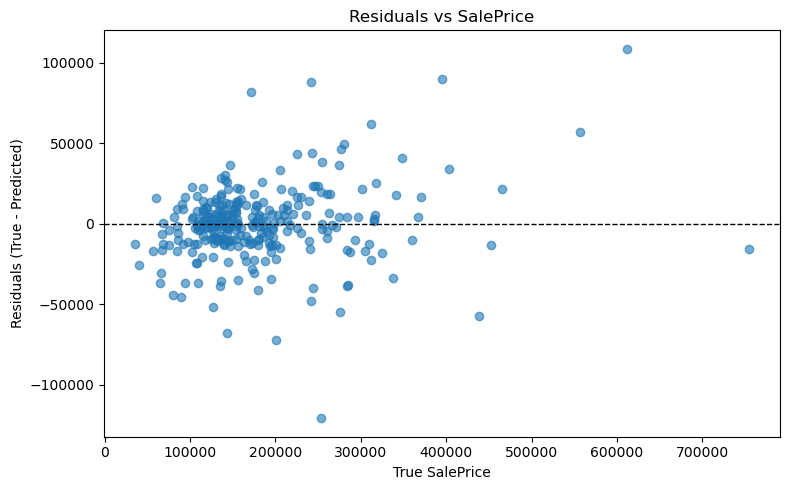

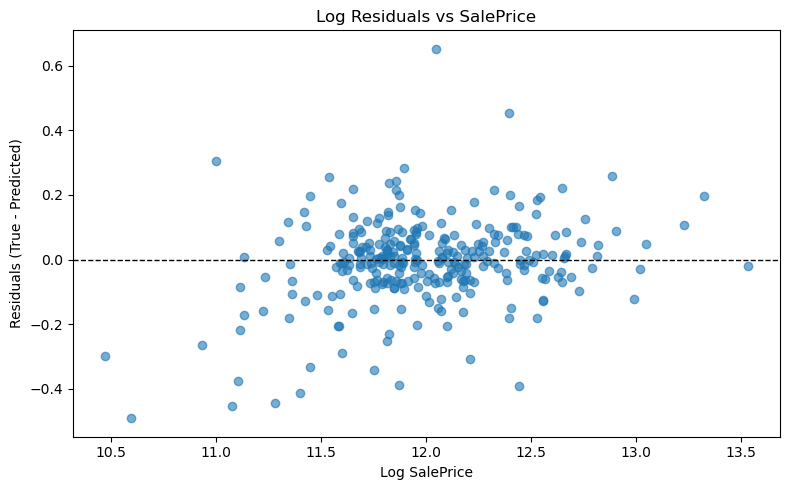

5-Fold CV RMSLE (log-target model):
  Fold 1: 0.13225
  Fold 2: 0.12552
  Fold 3: 0.23058
  Fold 4: 0.15497
  Fold 5: 0.11295
Mean RMSLE: 0.15125
Std  RMSLE: 0.04194


In [26]:

from sklearn.model_selection import KFold

TARGET_COL = "SalePrice"
y_raw = df[TARGET_COL].copy()
y_log = np.log1p(y_raw)
X = df.drop(columns=[TARGET_COL, "Id"])

# 2. Split
X_train, X_test, y_train_log, y_test_log = train_test_split(
    X, y_log, test_size=0.20, random_state=42
)

# 3. Preprocessor
num_cols = X.select_dtypes(include="number").columns.tolist()
cat_cols = X.select_dtypes(exclude="number").columns.tolist()

numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler",  StandardScaler())
])
categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="constant", fill_value="None")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", numeric_transformer, num_cols),
    ("cat", categorical_transformer, cat_cols)
])

# 4. Model pipeline
model_log = Pipeline([
    ("preproc", preprocessor),
    ("reg",     LinearRegression())
])

# 5. Fit on log-target
model_log.fit(X_train, y_train_log)

# 6. Compute training MSE in log-space (for bias correction)
y_train_log_pred = model_log.predict(X_train)
mse_train_log = np.mean((y_train_log - y_train_log_pred) ** 2)

# 7. Predict and bias-correct
y_test_log_pred = model_log.predict(X_test)
# Jensen's inequality correction: add half the training MSE
y_test_log_corrected = y_test_log_pred + 0.5 * mse_train_log

# Back-transform to original scale
y_test_pred = np.expm1(y_test_log_corrected)
y_test_true = np.expm1(y_test_log)

# 8. Plot residuals vs true SalePrice
residuals = y_test_true - y_test_pred
plt.figure(figsize=(8, 5))
plt.scatter(y_test_true, residuals, alpha=0.6)
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.xlabel("True SalePrice")
plt.ylabel("Residuals (True - Predicted)")
plt.title("Residuals vs SalePrice")
plt.tight_layout()
plt.show()

log_residuals = y_test_log - y_test_log_corrected
plt.figure(figsize=(8, 5))
plt.scatter(y_test_log, log_residuals, alpha=0.6)
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.xlabel("Log SalePrice")
plt.ylabel("Residuals (True - Predicted)")
plt.title("Log Residuals vs SalePrice")
plt.tight_layout()
plt.show()


# 9. Cross-validation with RMSLE
kf = KFold(n_splits=5, shuffle=True, random_state=42)
rmsle_scores = []

print("5-Fold CV RMSLE (log-target model):")
for fold, (train_idx, test_idx) in enumerate(kf.split(X), 1):
    # Train on log-target
    model_log.fit(X.iloc[train_idx], y_log.iloc[train_idx])
    # Compute training MSE in log-space for bias correction
    y_log_train_pred = model_log.predict(X.iloc[train_idx])
    mse_train = np.mean((y_log.iloc[train_idx] - y_log_train_pred) ** 2)
    # Predict and correct
    y_log_pred = model_log.predict(X.iloc[test_idx])
    y_log_pred_corr = y_log_pred + 0.5 * mse_train
    # Back-transform
    y_pred = np.expm1(y_log_pred_corr)
    y_true = np.expm1(y_log.iloc[test_idx])
    # Compute RMSLE
    rmsle = np.sqrt(mean_squared_log_error(y_true, y_pred))
    rmsle_scores.append(rmsle)
    print(f"  Fold {fold}: {rmsle:.5f}")

print(f"Mean RMSLE: {np.mean(rmsle_scores):.5f}")
print(f"Std  RMSLE: {np.std(rmsle_scores):.5f}")

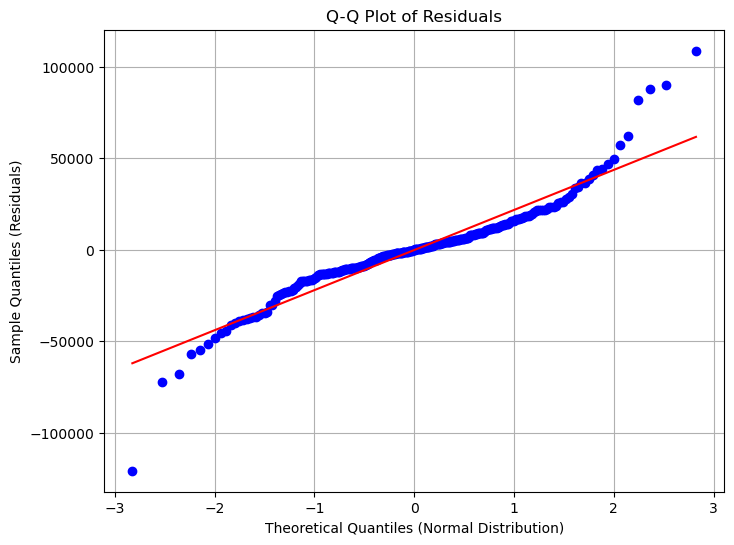

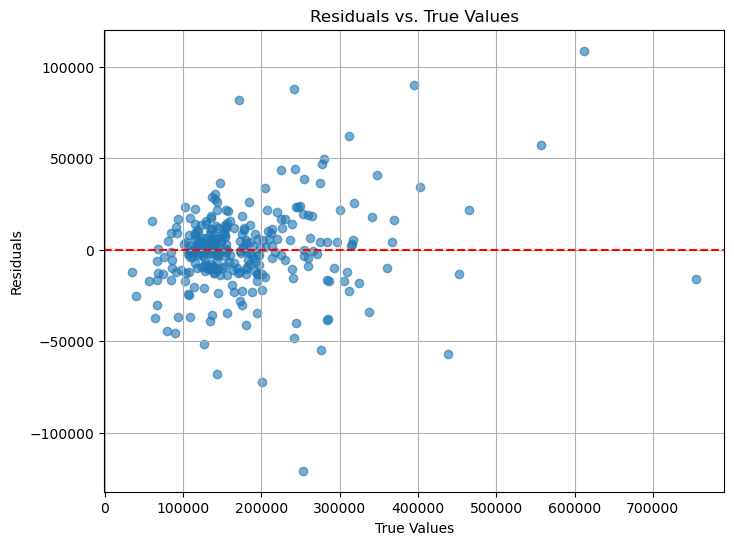

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Create the Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)  # Use stats.probplot
plt.title("Q-Q Plot of Residuals")
plt.xlabel("Theoretical Quantiles (Normal Distribution)")
plt.ylabel("Sample Quantiles (Residuals)")
plt.grid(True)
plt.show()

# If you also have y_test_true and want to plot residuals vs. predicted values:
# (This is a different plot, not a Q-Q plot)
# y_test_true = np.linspace(0, 10, 100)  # Sample y_test_true (replace with your actual data)
plt.figure(figsize=(8, 6))
plt.scatter(y_test_true, residuals, alpha=0.6)
plt.title("Residuals vs. True Values")
plt.xlabel("True Values")
plt.ylabel("Residuals")
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.grid(True)
plt.show()

(array([7.46193152e-07, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 7.46193152e-07, 7.46193152e-07,
        0.00000000e+00, 7.46193152e-07, 7.46193152e-07, 1.49238630e-06,
        1.49238630e-06, 2.98477261e-06, 5.96954521e-06, 1.49238630e-06,
        2.23857946e-06, 6.71573837e-06, 8.95431782e-06, 1.86548288e-05,
        1.94010219e-05, 2.61167603e-05, 3.20863055e-05, 2.38781809e-05,
        1.86548288e-05, 1.26852836e-05, 7.46193152e-06, 8.95431782e-06,
        2.98477261e-06, 1.49238630e-06, 2.23857946e-06, 2.23857946e-06,
        7.46193152e-07, 7.46193152e-07, 7.46193152e-07, 7.46193152e-07,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        7.46193152e-07, 1.49238630e-06, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 7.46193152e-07]),
 array([-120748.9063283 , -116159.40088145, -111569.8954346 ,
        -106980.38998775, -10239

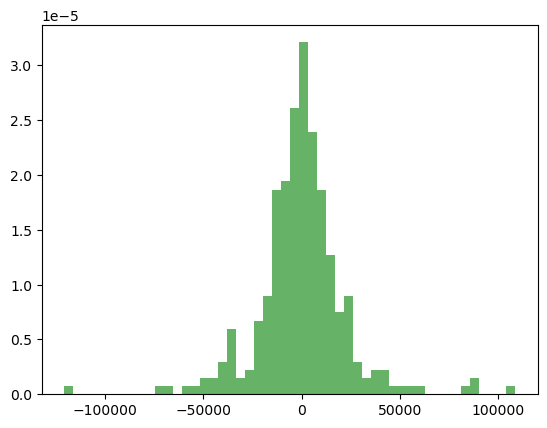

In [28]:
plt.hist(residuals, bins=50, density=True, alpha=0.6, color='g')

# Feature extraction

In [29]:
from sklearn.linear_model import LassoCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# 1. Separate features and log-transformed target
y = np.log1p(df["SalePrice"])
X = df.drop(columns=["SalePrice", "Id"])

# 2. Identify column types
num_cols = X.select_dtypes(include="number").columns.tolist()
cat_cols = X.select_dtypes(exclude="number").columns.tolist()

# 3. Build transformers
numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])
categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="constant", fill_value="None")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])
preprocessor = ColumnTransformer([
    ("num", numeric_transformer, num_cols),
    ("cat", categorical_transformer, cat_cols)
])

# 4. Full pipeline with LassoCV
lasso_pipe = Pipeline([
    ("preproc", preprocessor),
    ("lasso", LassoCV(cv=5, random_state=42, n_jobs=-1, max_iter=10000))
])

# 5. Fit model
lasso_pipe.fit(X, y)

# 6. Extract fitted Lasso model and alpha
lasso_model = lasso_pipe.named_steps["lasso"]
print(f"Chosen alpha (λ): {lasso_model.alpha_:.6f}")


Chosen alpha (λ): 0.000611


In [30]:
# Get feature names from preprocessor
ohe = lasso_pipe.named_steps["preproc"].named_transformers_["cat"].named_steps["onehot"]
cat_feature_names = ohe.get_feature_names_out(cat_cols)
all_feature_names = num_cols + list(cat_feature_names)

# Get selected features
nonzero_coefs = lasso_model.coef_ != 0
selected_features = np.array(all_feature_names)[nonzero_coefs]
print(f"Lasso selected {len(selected_features)} features:")
print(selected_features)


Lasso selected 107 features:
['MSSubClass' 'LotArea' 'OverallQual' 'OverallCond' 'YearBuilt'
 'YearRemodAdd' 'BsmtFinSF1' 'BsmtFinSF2' 'TotalBsmtSF' '1stFlrSF'
 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath' 'FullBath'
 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr' 'TotRmsAbvGrd' 'Fireplaces'
 'GarageYrBlt' 'GarageCars' 'GarageArea' 'WoodDeckSF' 'OpenPorchSF'
 'EnclosedPorch' '3SsnPorch' 'ScreenPorch' 'PoolArea' 'MiscVal' 'YrSold'
 'MSZoning_C (all)' 'MSZoning_RM' 'Alley_Pave' 'LotShape_IR2'
 'LandContour_Bnk' 'LotConfig_Corner' 'LotConfig_CulDSac' 'LandSlope_Mod'
 'Neighborhood_BrkSide' 'Neighborhood_ClearCr' 'Neighborhood_Crawfor'
 'Neighborhood_Edwards' 'Neighborhood_MeadowV' 'Neighborhood_Mitchel'
 'Neighborhood_NoRidge' 'Neighborhood_NridgHt' 'Neighborhood_Somerst'
 'Neighborhood_StoneBr' 'Condition1_Artery' 'Condition1_Norm'
 'Condition2_PosN' 'BldgType_1Fam' 'BldgType_2fmCon' 'BldgType_Twnhs'
 'HouseStyle_2Story' 'RoofStyle_Gable' 'RoofMatl_ClyTile'
 'Exterior1st_BrkFace' '

In [31]:
# Re-import necessary packages after state reset
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.metrics import mean_squared_log_error

# Load data (assumes file is uploaded)
df = pd.read_csv("train.csv")
y = np.log1p(df["SalePrice"])
X = df.drop(columns=["SalePrice", "Id"])

# Preprocessing setup
num_cols = X.select_dtypes(include="number").columns.tolist()
cat_cols = X.select_dtypes(exclude="number").columns.tolist()

numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])
categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="constant", fill_value="None")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", numeric_transformer, num_cols),
    ("cat", categorical_transformer, cat_cols)
])

# Split for final holdout test set
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 5-fold CV RMSLE evaluation function
def cross_val_rmsle(model, X, y):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    rmsles = []

    for train_idx, val_idx in kf.split(X):
        model.fit(X.iloc[train_idx], y.iloc[train_idx])
        y_pred_log = model.predict(X.iloc[val_idx])
        y_pred = np.expm1(y_pred_log)
        y_true = np.expm1(y.iloc[val_idx])
        rmsle = np.sqrt(mean_squared_log_error(y_true, y_pred))
        rmsles.append(rmsle)

    return np.mean(rmsles), np.std(rmsles)

# Lasso
lasso_model = Pipeline([
    ("preproc", preprocessor),
    ("reg", LassoCV(cv=5, random_state=42, max_iter=10000))
])

# Ridge
ridge_model = Pipeline([
    ("preproc", preprocessor),
    ("reg", RidgeCV(alphas=np.logspace(-3, 3, 50), cv=5))
])

# Evaluate with cross-validation
lasso_rmsle_mean, lasso_rmsle_std = cross_val_rmsle(lasso_model, X_train_full, y_train_full)
ridge_rmsle_mean, ridge_rmsle_std = cross_val_rmsle(ridge_model, X_train_full, y_train_full)

print(f"Lasso RMSLE (CV): {lasso_rmsle_mean:.5f} ± {lasso_rmsle_std:.5f}")
print(f"Ridge RMSLE (CV): {ridge_rmsle_mean:.5f} ± {ridge_rmsle_std:.5f}")


Lasso RMSLE (CV): 0.14111 ± 0.03285
Ridge RMSLE (CV): 0.14143 ± 0.03033


# COrrect categorical

In [32]:
cat_cols

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [33]:
# Re-import after reset
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, KFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_log_error

# Load the dataset
y = np.log1p(df["SalePrice"])
X = df.drop(columns=["SalePrice", "Id"])

# Categorical variables identified from data_description.txt
categorical_cols = [
    "MSSubClass", "MSZoning", "Street", "Alley", "LotShape", "LandContour",
    "Utilities", "LotConfig", "LandSlope", "Neighborhood", "Condition1",
    "Condition2", "BldgType", "HouseStyle", "RoofStyle", "RoofMatl",
    "Exterior1st", "Exterior2nd", "MasVnrType", "ExterQual", "ExterCond",
    "Foundation", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1",
    "BsmtFinType2", "Heating", "HeatingQC", "CentralAir", "Electrical",
    "KitchenQual", "Functional", "FireplaceQu", "GarageType", "GarageFinish",
    "GarageQual", "GarageCond", "PavedDrive", "PoolQC", "Fence", "MiscFeature",
    "SaleType", "SaleCondition"
]
X["MSSubClass"] = X["MSSubClass"].astype(str)


#Feature engineering: convert categorical columns to string type
X['Yrs_old'] = 2011 - X['YearBuilt']
X['Yrs_remodel'] = 2011 - X['YearRemodAdd']
# Numeric columns are the rest
numeric_cols = [col for col in X.columns if col not in categorical_cols]

# Define transformers
numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])
categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="constant", fill_value="None")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Combine transformers
preprocessor = ColumnTransformer([
    ("num", numeric_transformer, numeric_cols),
    ("cat", categorical_transformer, categorical_cols)
])

# Build Lasso pipeline
lasso_model = Pipeline([
    ("preproc", preprocessor),
    ("reg", LassoCV(cv=5, random_state=42, max_iter=10000))
])

ridge_model = Pipeline([
    ("preproc", preprocessor),
    ("reg", RidgeCV(alphas=np.logspace(-3, 3, 50), cv=5))
])

# CV RMSLE evaluation
def cross_val_rmsle(model, X, y):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    rmsles = []

    for train_idx, val_idx in kf.split(X):
        model.fit(X.iloc[train_idx], y.iloc[train_idx])
        y_pred_log = model.predict(X.iloc[val_idx])
        y_pred = np.expm1(y_pred_log)
        y_true = np.expm1(y.iloc[val_idx])
        rmsle = np.sqrt(mean_squared_log_error(y_true, y_pred))
        rmsles.append(rmsle)

    return np.mean(rmsles), np.std(rmsles)

# Run and evaluate
mean_rmsle, std_rmsle = cross_val_rmsle(lasso_model, X, y)
ridge_mean_rmsle, ridge_std_rmsle = cross_val_rmsle(ridge_model, X, y)


print(f"Lasso RMSLE (CV): {mean_rmsle:.5f} ± {std_rmsle:.5f}")
print(f"Ridge RMSLE (CV): {ridge_mean_rmsle:.5f} ± {ridge_std_rmsle:.5f}")


Lasso RMSLE (CV): 0.14290 ± 0.04280
Ridge RMSLE (CV): 0.14566 ± 0.04039


In [34]:
# Re-import after reset
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, KFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_log_error

# Load the dataset
y = np.log1p(df["SalePrice"])
X = df.drop(columns=["SalePrice", "Id"])

# Categorical variables identified from data_description.txt
categorical_cols = [
    "MSSubClass", "MSZoning", "Street", "Alley", "LotShape", "LandContour",
    "Utilities", "LotConfig", "LandSlope", "Neighborhood", "Condition1",
    "Condition2", "BldgType", "HouseStyle", "RoofStyle", "RoofMatl",
    "Exterior1st", "Exterior2nd", "MasVnrType", "ExterQual", "ExterCond",
    "Foundation", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1",
    "BsmtFinType2", "Heating", "HeatingQC", "CentralAir", "Electrical",
    "KitchenQual", "Functional", "FireplaceQu", "GarageType", "GarageFinish",
    "GarageQual", "GarageCond", "PavedDrive", "PoolQC", "Fence", "MiscFeature",
    "SaleType", "SaleCondition"
]
X["MSSubClass"] = X["MSSubClass"].astype(str)


#Feature engineering: convert categorical columns to string type
# X['Yrs_old'] = 2011 - X['YearBuilt']
# X['Yrs_remodel'] = 2011 - X['YearRemodAdd']
# Numeric columns are the rest
numeric_cols = [col for col in X.columns if col not in categorical_cols]

# Define transformers
numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])
categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="constant", fill_value="None")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Combine transformers
preprocessor = ColumnTransformer([
    ("num", numeric_transformer, numeric_cols),
    ("cat", categorical_transformer, categorical_cols)
])

# Build Lasso pipeline
lasso_model = Pipeline([
    ("preproc", preprocessor),
    ("reg", LassoCV(cv=5, random_state=42, max_iter=10000))
])

ridge_model = Pipeline([
    ("preproc", preprocessor),
    ("reg", RidgeCV(alphas=np.logspace(-3, 3, 50), cv=5))
])

# CV RMSLE evaluation
def cross_val_rmsle(model, X, y):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    rmsles = []

    for train_idx, val_idx in kf.split(X):
        model.fit(X.iloc[train_idx], y.iloc[train_idx])
        y_pred_log = model.predict(X.iloc[val_idx])
        y_pred = np.expm1(y_pred_log)
        y_true = np.expm1(y.iloc[val_idx])
        rmsle = np.sqrt(mean_squared_log_error(y_true, y_pred))
        rmsles.append(rmsle)

    return np.mean(rmsles), np.std(rmsles)

# Run and evaluate
mean_rmsle, std_rmsle = cross_val_rmsle(lasso_model, X, y)
ridge_mean_rmsle, ridge_std_rmsle = cross_val_rmsle(ridge_model, X, y)


print(f"Lasso RMSLE (CV): {mean_rmsle:.5f} ± {std_rmsle:.5f}")
print(f"Ridge RMSLE (CV): {ridge_mean_rmsle:.5f} ± {ridge_std_rmsle:.5f}")


Lasso RMSLE (CV): 0.14294 ± 0.04287
Ridge RMSLE (CV): 0.14569 ± 0.04026


In [35]:
lasso_model = lasso_model.named_steps["reg"]
# Get numeric feature names
num_features = preprocessor.transformers_[0][2]

# Get one-hot encoded feature names from OHE
cat_pipeline = preprocessor.transformers_[1][1]
ohe = cat_pipeline.named_steps["onehot"]
cat_features = ohe.get_feature_names_out(preprocessor.transformers_[1][2])

# Combine all features in order of final matrix
all_features = np.concatenate([num_features, cat_features])


In [36]:
# Get coefficients
coefs = lasso_model.coef_

# Mask for non-zero weights
nonzero_mask = coefs != 0

# Select features and weights
selected_features = all_features[nonzero_mask]
selected_coefs = coefs[nonzero_mask]

# Combine and sort
sorted_features = sorted(zip(selected_features, selected_coefs), key=lambda x: -abs(x[1]))

# Print top N
print("Top Lasso Features (by absolute weight):")
for feat, weight in sorted_features[:20]:
    print(f"{feat:30s} {weight: .4f}")


Top Lasso Features (by absolute weight):
RoofMatl_ClyTile               -0.8012
MSZoning_C (all)               -0.2423
Condition2_PosN                -0.1406
Neighborhood_Crawfor            0.1004
GrLivArea                       0.0967
OverallQual                     0.0877
Neighborhood_NridgHt            0.0830
Neighborhood_StoneBr            0.0725
Neighborhood_Edwards           -0.0671
SaleCondition_Abnorml          -0.0653
MSZoning_RM                    -0.0618
CentralAir_N                   -0.0570
Exterior1st_BrkFace             0.0545
MSSubClass_160                 -0.0540
Functional_Typ                  0.0511
Neighborhood_Somerst            0.0493
YearBuilt                       0.0453
Condition1_Norm                 0.0453
BsmtExposure_Gd                 0.0435
OverallCond                     0.0432


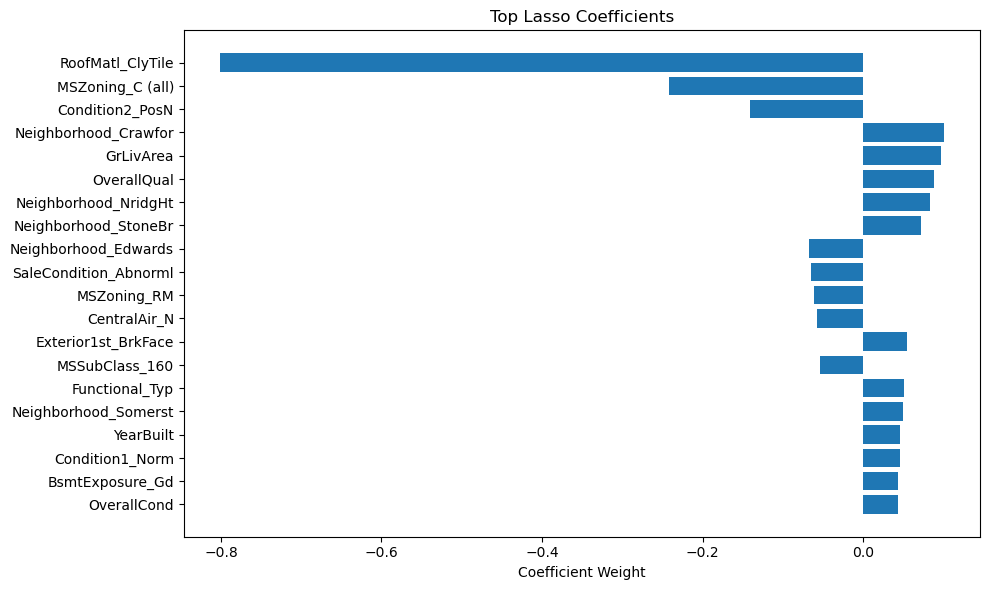

In [37]:
import matplotlib.pyplot as plt

top_k = 20
top_feats = sorted_features[:top_k]
feat_names = [f[0] for f in top_feats]
weights = [f[1] for f in top_feats]

plt.figure(figsize=(10, 6))
plt.barh(feat_names[::-1], weights[::-1])  # reverse for top-down
plt.xlabel("Coefficient Weight")
plt.title("Top Lasso Coefficients")
plt.tight_layout()
plt.show()


# Dealing with multi collineartiy

In [38]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_log_error
import numpy as np

drop_cols = [
    "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF",  # keep TotalBsmtSF
    "1stFlrSF", "2ndFlrSF", "LowQualFinSF","SalePrice","Id"  # keep GrLivArea
]
df = pd.read_csv("train.csv")
X = df.drop(columns=drop_cols)
X["MSSubClass"] = X["MSSubClass"].astype(str)

# Categorical columns you want to use
categorical_cols = [
    "MSSubClass", "MSZoning", "Street", "Alley", "LotShape", "LandContour",
    "Utilities", "LotConfig", "LandSlope", "Neighborhood", "Condition1",
    "Condition2", "BldgType", "HouseStyle", "RoofStyle", "RoofMatl",
    "Exterior1st", "Exterior2nd", "MasVnrType", "ExterQual", "ExterCond",
    "Foundation", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1",
    "BsmtFinType2", "Heating", "HeatingQC", "CentralAir", "Electrical",
    "KitchenQual", "Functional", "FireplaceQu", "GarageType", "GarageFinish",
    "GarageQual", "GarageCond", "PavedDrive", "PoolQC", "Fence", "MiscFeature",
    "SaleType", "SaleCondition"
]

# Keep only those that actually exist in the dataset
categorical_cols = [col for col in categorical_cols if col in X.columns]
numeric_cols = [col for col in X.columns if col not in categorical_cols]
preprocessor = ColumnTransformer([
    ("num", Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ]), numeric_cols),
    
    ("cat", Pipeline([
        ("imputer", SimpleImputer(strategy="constant", fill_value="None")),
        ("onehot", OneHotEncoder(handle_unknown="ignore"))
    ]), categorical_cols)
])

lasso_model = Pipeline([
    ("preproc", preprocessor),
    ("reg", LassoCV(cv=5, random_state=42, max_iter=10000))
])


kf = KFold(n_splits=5, shuffle=True, random_state=42)
rmsles = []

for train_idx, val_idx in kf.split(X):
    lasso_model.fit(X.iloc[train_idx], y.iloc[train_idx])
    y_pred_log = lasso_model.predict(X.iloc[val_idx])
    y_pred = np.expm1(y_pred_log)
    y_true = np.expm1(y.iloc[val_idx])
    rmsles.append(np.sqrt(mean_squared_log_error(y_true, y_pred)))

print(f"Mean RMSLE: {np.mean(rmsles):.5f} ± {np.std(rmsles):.5f}")


Mean RMSLE: 0.14121 ± 0.03922


## Dealing with high skew columns

In [92]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_log_error
import numpy as np

drop_cols = [
    "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF",  # keep TotalBsmtSF
    "1stFlrSF", "2ndFlrSF", "LowQualFinSF","SalePrice","Id"  # keep GrLivArea
]
df = pd.read_csv("train.csv")
print(df.shape)
df = df[(df['GrLivArea']<4000) & (df['SalePrice']<700000)]
# df = df.iloc[1:,:]
print(df.shape)
y = np.log(df['SalePrice'])
X = df.drop(columns=drop_cols).copy()

X["MSSubClass"] = X["MSSubClass"].astype(str)

for col in ('GarageYrBlt', 'GarageArea', 'GarageCars', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    X[col] = X[col].fillna(0)

# Categorical columns you want to use
categorical_cols = [
    "MSSubClass", "MSZoning", "Street", "Alley", "LotShape", "LandContour",
    "Utilities", "LotConfig", "LandSlope", "Neighborhood", "Condition1",
    "Condition2", "BldgType", "HouseStyle", "RoofStyle", "RoofMatl",
    "Exterior1st", "Exterior2nd", "MasVnrType", "ExterQual", "ExterCond",
    "Foundation", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1",
    "BsmtFinType2", "Heating", "HeatingQC", "CentralAir", "Electrical",
    "KitchenQual", "Functional", "FireplaceQu", "GarageType", "GarageFinish",
    "GarageQual", "GarageCond", "PavedDrive", "PoolQC", "Fence", "MiscFeature",
    "SaleType", "SaleCondition"
]

# Keep only those that actually exist in the dataset
categorical_cols = [col for col in categorical_cols if col in X.columns]
numeric_cols = [col for col in X.columns if col not in categorical_cols]
preprocessor = ColumnTransformer([
    ("num", Pipeline([
        ("imputer", SimpleImputer(strategy="constant", fill_value=0)),
        ("scaler", StandardScaler())
    ]), numeric_cols),
    
    ("cat", Pipeline([
        ("imputer", SimpleImputer(strategy="constant", fill_value="None")),
        ("onehot", OneHotEncoder(handle_unknown="ignore"))
    ]), categorical_cols)
])

lasso_model = Pipeline([
    ("preproc", preprocessor),
    ("reg", LassoCV(cv=5, random_state=420, max_iter=10000))
])

#dealing with high skew values, RMSLE reduction of 0.005
skew_vals = X[numeric_cols].skew().sort_values(ascending=False)
high_skew_cols = skew_vals[abs(skew_vals) > 0.8].index.tolist()
print(f"High skew columns: {high_skew_cols}")
X[high_skew_cols] = X[high_skew_cols].apply(lambda x: np.log1p(x))
# X[high_skew_cols] = X[high_skew_cols].apply(lambda x: boxcox1p(x,0.15)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
rmsles = []

for train_idx, val_idx in kf.split(X):
    lasso_model.fit(X.iloc[train_idx], y.iloc[train_idx])
    y_pred_log = lasso_model.predict(X.iloc[val_idx])
    y_pred = np.expm1(y_pred_log)
    y_true = np.expm1(y.iloc[val_idx])
    rmsles.append(np.sqrt(mean_squared_log_error(y_true, y_pred)))

print(f"Mean RMSLE: {np.mean(rmsles):.5f} ± {np.std(rmsles):.5f}")


(1460, 81)
(1456, 81)
High skew columns: ['MiscVal', 'PoolArea', 'LotArea', '3SsnPorch', 'KitchenAbvGr', 'BsmtHalfBath', 'ScreenPorch', 'EnclosedPorch', 'MasVnrArea', 'OpenPorchSF', 'WoodDeckSF', 'LotFrontage', 'GrLivArea', 'GarageYrBlt']
Mean RMSLE: 0.11049 ± 0.00720


In [86]:
# lasso_model.fit(X, y)
y_pred_log = lasso_model.predict(X)
y_pred = np.expm1(y_pred_log)
y_true = np.expm1(y)
print(f"RMSLE: {np.sqrt(mean_squared_log_error(y_true, y_pred)):.5f}")

RMSLE: 0.10095


In [89]:
# lasso_model.fit(X, y)
y_pred_log = lasso_model.predict(X.iloc[val_idx])
y_pred = np.expm1(y_pred_log)
y_true = np.expm1(y.iloc[val_idx])
print(f"RMSLE: {np.sqrt(mean_squared_log_error(y_true, y_pred)):.5f}")

test = pd.read_csv('test.csv')
test[high_skew_cols] = test[high_skew_cols].apply(lambda x: np.log1p(x))
drop_cols = [
    "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF",  # keep TotalBsmtSF
    "1stFlrSF", "2ndFlrSF", "LowQualFinSF"]
test = test.drop(columns=drop_cols)
test["MSSubClass"] = test["MSSubClass"].astype(str)

pred = lasso_model.predict(test)
submission = pd.DataFrame({
    'Id': test['Id'],
    'SalePrice': np.expm1(pred)
})
submission.to_csv('submission3.csv', index=False)

RMSLE: 0.09741


In [80]:
X.shape

(1460, 73)

In [60]:
X = pd.read_csv("train.csv")

ordinal_maps = {
    "Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, "None": 0, np.nan: 0
}

ordinal_cols = [
    "ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "BsmtExposure",
    "BsmtFinType1", "BsmtFinType2", "HeatingQC", "KitchenQual",
    "FireplaceQu", "GarageQual", "GarageCond", "PoolQC"
]

for col in ordinal_cols:
    if col in X.columns:
        X[col] = X[col].map(ordinal_maps).fillna(0)

X["MSSubClass"] = X["MSSubClass"].astype(str)
X['Yrs_old'] = 2011 - X['YearBuilt']
X['Yrs_remodel'] = 2011 - X['YearRemodAdd']
X['TotalSF'] = X['TotalBsmtSF'] + X['1stFlrSF'] + X['2ndFlrSF']

drop_cols = [
    "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF",  # keep TotalBsmtSF
    "1stFlrSF", "2ndFlrSF", "LowQualFinSF","SalePrice","Id", # keep GrLivArea
]
X = df.drop(columns=drop_cols)

# Categorical columns you want to use
categorical_cols = [
    "MSSubClass", "MSZoning", "Street", "Alley", "LotShape", "LandContour",
    "Utilities", "LotConfig", "LandSlope", "Neighborhood", "Condition1",
    "Condition2", "BldgType", "HouseStyle", "RoofStyle", "RoofMatl",
    "Exterior1st", "Exterior2nd", "MasVnrType", "ExterQual", "ExterCond",
    "Foundation", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1",
    "BsmtFinType2", "Heating", "HeatingQC", "CentralAir", "Electrical",
    "KitchenQual", "Functional", "FireplaceQu", "GarageType", "GarageFinish",
    "GarageQual", "GarageCond", "PavedDrive", "PoolQC", "Fence", "MiscFeature",
    "SaleType", "SaleCondition"
]


# Keep only those that actually exist in the dataset
categorical_cols = [col for col in categorical_cols if col in X.columns]
numeric_cols = [col for col in X.columns if col not in categorical_cols]
preprocessor = ColumnTransformer([
    ("num", Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ]), numeric_cols),
    
    ("cat", Pipeline([
        ("imputer", SimpleImputer(strategy="constant", fill_value="None")),
        ("onehot", OneHotEncoder(handle_unknown="ignore"))
    ]), categorical_cols)
])

ridge_model = Pipeline([
    ("preproc", preprocessor),
    ("reg", RidgeCV(alphas=np.logspace(-3, 3, 50), cv=5))
])

#dealing with high skew values, RMSLE reduction of 0.005
skew_vals = X[numeric_cols].skew().sort_values(ascending=False)
high_skew_cols = skew_vals[abs(skew_vals) > 0.8].index.tolist()
print(f"High skew columns: {high_skew_cols}")

X[high_skew_cols] = X[high_skew_cols].apply(lambda x: np.log1p(x))
# X[high_skew_cols] = X[high_skew_cols].apply(lambda x: boxcox1p(x,0.15)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
rmsles = []

for train_idx, val_idx in kf.split(X):
    ridge_model.fit(X.iloc[train_idx], y.iloc[train_idx])
    y_pred_log = ridge_model.predict(X.iloc[val_idx])
    y_pred = np.expm1(y_pred_log)
    y_true = np.expm1(y.iloc[val_idx])
    rmsles.append(np.sqrt(mean_squared_log_error(y_true, y_pred)))

print(f"Mean RMSLE: {np.mean(rmsles):.5f} ± {np.std(rmsles):.5f}")


High skew columns: ['MiscVal', 'PoolArea', 'LotArea', '3SsnPorch', 'KitchenAbvGr', 'ScreenPorch', 'BsmtHalfBath', 'EnclosedPorch', 'MasVnrArea', 'OpenPorchSF', 'LotFrontage', 'WoodDeckSF', 'TotalBsmtSF', 'GrLivArea']
Mean RMSLE: 0.13012 ± 0.02026


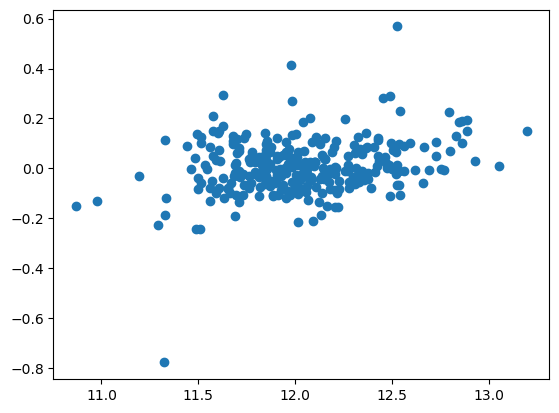

In [59]:
residuals = y.iloc[val_idx] - y_pred_log
plt.scatter(y.iloc[val_idx], residuals)


In [87]:
lasso_model.fit(X, y)
y_pred_log = lasso_model.predict(X.iloc[val_idx])
y_pred = np.expm1(y_pred_log)
y_true = np.expm1(y.iloc[val_idx])
print(f"RMSLE: {np.sqrt(mean_squared_log_error(y_true, y_pred)):.5f}")

test = pd.read_csv('test.csv')
test[high_skew_cols] = test[high_skew_cols].apply(lambda x: np.log1p(x))
drop_cols = [
    "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF",  # keep TotalBsmtSF
    "1stFlrSF", "2ndFlrSF", "LowQualFinSF"]
test = test.drop(columns=drop_cols)
test["MSSubClass"] = test["MSSubClass"].astype(str)

pred = lasso_model.predict(test)
submission = pd.DataFrame({
    'Id': test['Id'],
    'SalePrice': np.expm1(pred)
})
submission.to_csv('submission3.csv', index=False)

RMSLE: 0.08703


In [42]:
# Numeric and categorical transformers
numeric_features = preprocessor.transformers_[0][2]
cat_features = preprocessor.transformers_[1][1].named_steps["onehot"].get_feature_names_out(preprocessor.transformers_[1][2])

# Combine
feature_names = np.concatenate([numeric_features, cat_features])
coefs = lasso_model.named_steps["reg"].coef_
coef_df = pd.DataFrame({
    "feature": feature_names,
    "coefficient": coefs
})
coef_df["abs_coeff"] = np.abs(coef_df["coefficient"])

# Sort from most influential to least
sorted_coefs = coef_df.sort_values(by="abs_coeff", ascending=False)


In [43]:
print(sorted_coefs.head(20))  # top 20


                   feature  coefficient  abs_coeff
133       RoofMatl_ClyTile    -0.536381   0.536381
44        MSZoning_C (all)    -0.279647   0.279647
8                GrLivArea     0.143992   0.143992
110        Condition2_PosN    -0.123333   0.123333
94    Neighborhood_StoneBr     0.107972   0.107972
78    Neighborhood_Crawfor     0.098698   0.098698
87    Neighborhood_NoRidge     0.086204   0.086204
88    Neighborhood_NridgHt     0.071738   0.071738
2              OverallQual     0.070067   0.070067
144    Exterior1st_BrkFace     0.069384   0.069384
249         Functional_Typ     0.069087   0.069087
239         KitchenQual_Ex     0.064091   0.064091
79    Neighborhood_Edwards    -0.056005   0.056005
191            BsmtQual_Ex     0.052817   0.052817
4                YearBuilt     0.051757   0.051757
305  SaleCondition_Abnorml    -0.051642   0.051642
99         Condition1_Norm     0.049820   0.049820
3              OverallCond     0.048401   0.048401
212       BsmtFinType1_Unf    -

# XGBoost

In [ ]:
from xgboost import XGBRegressor
df = pd.read_csv("train.csv")
drop_cols = [
    "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF",
    "1stFlrSF", "2ndFlrSF", "LowQualFinSF", "SalePrice", "Id"
]
X = df.drop(columns=drop_cols)
y = np.log1p(df["SalePrice"])
X["MSSubClass"] = X["MSSubClass"].astype(str)

categorical_cols = [
    "MSSubClass", "MSZoning", "Street", "Alley", "LotShape", "LandContour",
    "Utilities", "LotConfig", "LandSlope", "Neighborhood", "Condition1",
    "Condition2", "BldgType", "HouseStyle", "RoofStyle", "RoofMatl",
    "Exterior1st", "Exterior2nd", "MasVnrType", "ExterQual", "ExterCond",
    "Foundation", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1",
    "BsmtFinType2", "Heating", "HeatingQC", "CentralAir", "Electrical",
    "KitchenQual", "Functional", "FireplaceQu", "GarageType", "GarageFinish",
    "GarageQual", "GarageCond", "PavedDrive", "PoolQC", "Fence", "MiscFeature",
    "SaleType", "SaleCondition"
]
categorical_cols = [col for col in categorical_cols if col in X.columns]
numeric_cols = [col for col in X.columns if col not in categorical_cols]

# Detect and log-transform skewed numeric features
skew_vals = X[numeric_cols].skew().sort_values(ascending=False)
high_skew_cols = skew_vals[abs(skew_vals) > 0.8].index.tolist()
print(f"High skew columns: {high_skew_cols}")
X[high_skew_cols] = X[high_skew_cols].apply(np.log1p)

# Preprocessor (no scaling for XGBoost)
preprocessor = ColumnTransformer([
    ("num", SimpleImputer(strategy="median"), numeric_cols),
    ("cat", Pipeline([
        ("imputer", SimpleImputer(strategy="constant", fill_value="None")),
        ("onehot", OneHotEncoder(handle_unknown="ignore"))
    ]), categorical_cols)
])

# Full pipeline with XGBoost
xgb_model = Pipeline([
    ("preproc", preprocessor),
    ("reg", XGBRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=4,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1,
    ))
])
# Cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
rmsles = []

for train_idx, val_idx in kf.split(X):
    xgb_model.fit(X.iloc[train_idx], y.iloc[train_idx])
    y_pred_log = xgb_model.predict(X.iloc[val_idx])
    y_pred = np.expm1(y_pred_log)
    y_true = np.expm1(y.iloc[val_idx])
    rmsles.append(np.sqrt(mean_squared_log_error(y_true, y_pred)))

print(f"XGBoost RMSLE: {np.mean(rmsles):.5f} ± {np.std(rmsles):.5f}")


High skew columns: ['MiscVal', 'PoolArea', 'LotArea', '3SsnPorch', 'KitchenAbvGr', 'ScreenPorch', 'BsmtHalfBath', 'EnclosedPorch', 'MasVnrArea', 'OpenPorchSF', 'LotFrontage', 'WoodDeckSF', 'TotalBsmtSF', 'GrLivArea']
XGBoost RMSLE: 0.12973 ± 0.01832


# PCA

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_log_error
from sklearn.decomposition import PCA
from sklearn.linear_model import RidgeCV  # or LinearRegression or LassoCV

# Step 1: build a new pipeline
pca_regression_model = Pipeline([
    ("preproc", preprocessor),          # same as before: impute + encode
    ("pca", PCA(n_components=35
    )),    # keep 95% of variance
    ("reg", RidgeCV(alphas=np.logspace(-3, 3, 50), cv=5))  # or LinearRegression()
])
kf = KFold(n_splits=5, shuffle=True, random_state=42)
rmsles = []

for train_idx, val_idx in kf.split(X):
    pca_regression_model.fit(X.iloc[train_idx], y.iloc[train_idx])
    y_pred_log = pca_regression_model.predict(X.iloc[val_idx])
    y_pred = np.expm1(y_pred_log)
    y_true = np.expm1(y.iloc[val_idx])
    rmsles.append(np.sqrt(mean_squared_log_error(y_true, y_pred)))

print(f"PCA + Ridge RMSLE: {np.mean(rmsles):.5f} ± {np.std(rmsles):.5f}")


PCA + Ridge RMSLE: 0.15087 ± 0.01524


In [52]:
# Step 1: build a new pipeline

for i in range(10,50):
    pca_regression_model = Pipeline([
        ("preproc", preprocessor),          # same as before: impute + encode
        ("pca", PCA(n_components=i
        )),    # keep 95% of variance
        ("reg", RidgeCV(alphas=np.logspace(-3, 3, 50), cv=5))  # or LinearRegression()
    ])
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    rmsles = []

    for train_idx, val_idx in kf.split(X):
        pca_regression_model.fit(X.iloc[train_idx], y.iloc[train_idx])
        y_pred_log = pca_regression_model.predict(X.iloc[val_idx])
        y_pred = np.expm1(y_pred_log)
        y_true = np.expm1(y.iloc[val_idx])
        rmsles.append(np.sqrt(mean_squared_log_error(y_true, y_pred)))

    print(f"PCs:{i}PCA + Ridge RMSLE: {np.mean(rmsles):.5f} ± {np.std(rmsles):.5f}")

PCs:10PCA + Ridge RMSLE: 0.20457 ± 0.01554
PCs:11PCA + Ridge RMSLE: 0.19399 ± 0.01578
PCs:12PCA + Ridge RMSLE: 0.19125 ± 0.01479
PCs:13PCA + Ridge RMSLE: 0.19060 ± 0.01594
PCs:14PCA + Ridge RMSLE: 0.18351 ± 0.01556
PCs:15PCA + Ridge RMSLE: 0.18251 ± 0.01534
PCs:16PCA + Ridge RMSLE: 0.16835 ± 0.01748
PCs:17PCA + Ridge RMSLE: 0.15524 ± 0.01624
PCs:18PCA + Ridge RMSLE: 0.15540 ± 0.01644
PCs:19PCA + Ridge RMSLE: 0.15562 ± 0.01665
PCs:20PCA + Ridge RMSLE: 0.15528 ± 0.01635
PCs:21PCA + Ridge RMSLE: 0.15364 ± 0.01731
PCs:22PCA + Ridge RMSLE: 0.15410 ± 0.01764
PCs:23PCA + Ridge RMSLE: 0.15398 ± 0.01762
PCs:24PCA + Ridge RMSLE: 0.15408 ± 0.01756
PCs:25PCA + Ridge RMSLE: 0.15289 ± 0.01670
PCs:26PCA + Ridge RMSLE: 0.15287 ± 0.01647
PCs:27PCA + Ridge RMSLE: 0.15272 ± 0.01653
PCs:28PCA + Ridge RMSLE: 0.15261 ± 0.01650
PCs:29PCA + Ridge RMSLE: 0.15221 ± 0.01628
PCs:30PCA + Ridge RMSLE: 0.15211 ± 0.01614
PCs:31PCA + Ridge RMSLE: 0.15152 ± 0.01578
PCs:32PCA + Ridge RMSLE: 0.15152 ± 0.01579
PCs:33PCA +

# Random Forest

In [95]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

# ─── keep your existing `preprocessor` ───
rf_model = Pipeline([
    ("preproc", preprocessor),                # same ColumnTransformer
    ("reg", RandomForestRegressor(            # ← only this line changes
        n_estimators=600,
        max_depth=None,          # let the trees grow; tune if over-fit
        min_samples_leaf=2,
        max_features="sqrt",
        n_jobs=-1,
        random_state=42
    ))
])


df = pd.read_csv("train.csv")
drop_cols = [
    "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF",
    "1stFlrSF", "2ndFlrSF", "LowQualFinSF", "SalePrice", "Id"
]
X = df.drop(columns=drop_cols)
y = np.log1p(df["SalePrice"])
X["MSSubClass"] = X["MSSubClass"].astype(str)

categorical_cols = [
    "MSSubClass", "MSZoning", "Street", "Alley", "LotShape", "LandContour",
    "Utilities", "LotConfig", "LandSlope", "Neighborhood", "Condition1",
    "Condition2", "BldgType", "HouseStyle", "RoofStyle", "RoofMatl",
    "Exterior1st", "Exterior2nd", "MasVnrType", "ExterQual", "ExterCond",
    "Foundation", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1",
    "BsmtFinType2", "Heating", "HeatingQC", "CentralAir", "Electrical",
    "KitchenQual", "Functional", "FireplaceQu", "GarageType", "GarageFinish",
    "GarageQual", "GarageCond", "PavedDrive", "PoolQC", "Fence", "MiscFeature",
    "SaleType", "SaleCondition"
]
categorical_cols = [col for col in categorical_cols if col in X.columns]
numeric_cols = [col for col in X.columns if col not in categorical_cols]

# Detect and log-transform skewed numeric features
# skew_vals = X[numeric_cols].skew().sort_values(ascending=False)
# high_skew_cols = skew_vals[abs(skew_vals) > 0.8].index.tolist()
# print(f"High skew columns: {high_skew_cols}")
# X[high_skew_cols] = X[high_skew_cols].apply(np.log1p)

# Preprocessor (no scaling for XGBoost)
preprocessor = ColumnTransformer([
    ("num", SimpleImputer(strategy="median"), numeric_cols),
    ("cat", Pipeline([
        ("imputer", SimpleImputer(strategy="constant", fill_value="None")),
        ("onehot", OneHotEncoder(handle_unknown="ignore"))
    ]), categorical_cols)
])

# ─── keep your existing `preprocessor` ───
rf_model = Pipeline([
    ("preproc", preprocessor),                # same ColumnTransformer
    ("reg", RandomForestRegressor(            # ← only this line changes
        n_estimators=600,
        max_depth=None,          # let the trees grow; tune if over-fit
        min_samples_leaf=2,
        max_features="sqrt",
        n_jobs=-1,
        random_state=42
    ))
])

# Cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
rmsles = []

for train_idx, val_idx in kf.split(X):
    xgb_model.fit(X.iloc[train_idx], y.iloc[train_idx])
    y_pred_log = xgb_model.predict(X.iloc[val_idx])
    y_pred = np.expm1(y_pred_log)
    y_true = np.expm1(y.iloc[val_idx])
    rmsles.append(np.sqrt(mean_squared_log_error(y_true, y_pred)))

print(f"Decision Tree RMSLE: {np.mean(rmsles):.5f} ± {np.std(rmsles):.5f}")


Decision Tree RMSLE: 0.12973 ± 0.01832
